# Exploratory Data Analysis

In [1]:
import geopandas as gpd
import pandas as pd
import os
import sqlalchemy

In [2]:
# creates connection to local SQLite database
databases_dirpath = os.path.join('data/databases')
demographics_db_filepath = os.path.join(databases_dirpath, 'census_acs_1yr_2022.db')

# creates connection to SQLite database
sql_engine = sqlalchemy.create_engine('sqlite:///' + demographics_db_filepath)

In [3]:
df = pd.read_sql_table('puma', con=sql_engine)
gs = gpd.GeoSeries.from_wkt(df['geometry'])
gdf = gpd.GeoDataFrame(df, geometry=gs)
gdf.head()

,index,NAME,population_by_sex__estimate_total__K200101_001E,population_by_sex__estimate_total_male__K200101_002E,population_by_sex__estimate_total_female__K200101_003E,ucgid,population_by_age__estimate_total__K200104_001E,population_by_age__estimate_total_under_18_years__K200104_002E,population_by_age__estimate_total_18_to_24_years__K200104_003E,population_by_age__estimate_total_25_to_34_years__K200104_004E,...,public_health_insurance_status\n__estimate_total_with_public_coverage__K202703_002E,public_health_insurance_status__estimate_total_no_public_coverage__K202703_003E,presence_of_a_computer_and_type_of_internet_subscription_in_household\n__estimate_total__K202801_001E,presence_of_a_computer_and_type_of_internet_subscription_in_household\n__estimate_total_has_a_computer__K202801_002E,presence_of_a_computer_and_type_of_internet_subscription_in_household\n__estimate_total_has_a_computer_with_dial-up_internet_subscription_alone__K202801_003E,presence_of_a_computer_and_type_of_internet_subscription_in_household\n__estimate_total_has_a_computer_with_a_broadband_internet_subscription__K202801_004E,presence_of_a_computer_and_type_of_internet_subscription_in_household\n__estimate_total_has_a_computer_without_an_internet_subscription__K202801_005E,presence_of_a_computer_and_type_of_internet_subscription_in_household\n__estimate_total_no_computer__K202801_006E,GEOIDFQ20,geometry
0,0,San Antonio City (Southwest)--Inside Loop I-41...,116206,59026,57180,795P200US4805906,116206,32103,14417,13727,...,51207,64599,37413,35525,113,31514,3898,1888,795P200US4805906,"POLYGON ((-98.50380 29.32030, -98.50380 29.320..."
1,1,Bexar County (South)--San Antonio City (Far So...,155224,79243,75981,795P200US4805907,155224,38131,16498,25816,...,53032,97441,54274,52953,39,48721,4193,1321,795P200US4805907,"POLYGON ((-98.30460 29.23700, -98.30470 29.236..."
2,2,"San Antonio (Northeast), Kirby & Windcrest Cit...",135956,67598,68358,795P200US4805913,135956,30607,13982,21932,...,45588,89373,48702,47405,0,44854,2551,1297,795P200US4805913,"POLYGON ((-98.31700 29.45930, -98.31710 29.458..."
3,3,San Antonio City (Northwest)--Inside Loop I-41...,101698,52478,49220,795P200US4805904,101698,24053,10393,12265,...,39344,61450,39082,36522,0,34579,1943,2560,795P200US4805904,"POLYGON ((-98.52590 29.51740, -98.52570 29.517..."
4,4,San Antonio City (Southeast)--Inside Loop I-41...,120621,59441,61180,795P200US4805903,120621,30282,10140,18694,...,52370,67200,43200,40803,0,37616,3187,2397,795P200US4805903,"POLYGON ((-98.43890 29.41340, -98.43720 29.413..."


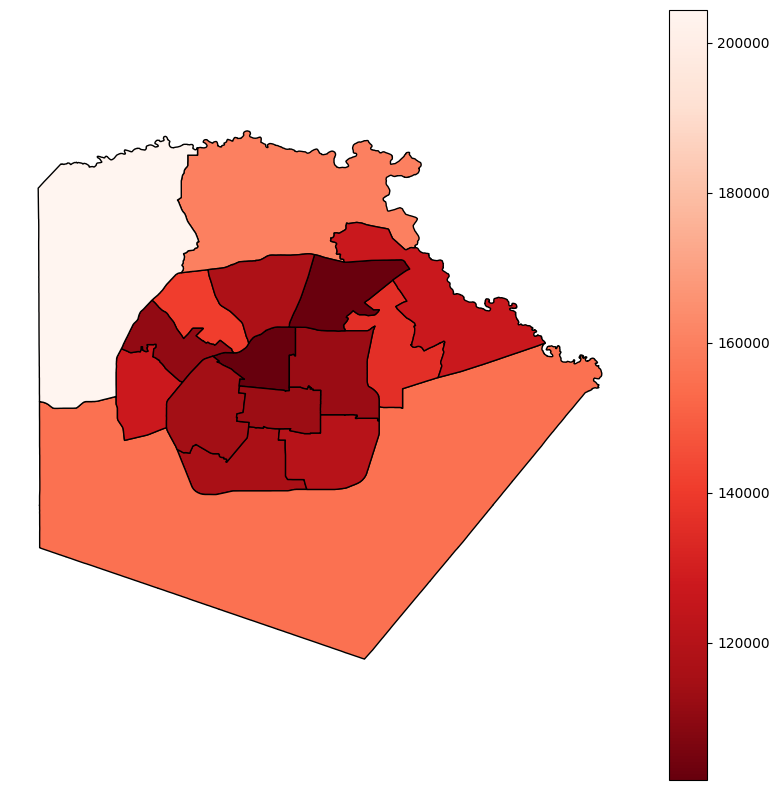

In [4]:
ax = (gdf.plot(column='population_by_sex__estimate_total__K200101_001E',
                     legend=True,
                     cmap='Reds_r',
                     figsize=(10,10),
                     edgecolor='black').
      set_axis_off())

ax